In [7]:
# %load adj_functions.sage
import numpy as np
from numpy import linalg

################################################################################
# Function: idempotents                                                        #
#                                                                              #
# Purpose: find principal idempotents of a Hermitian matrix                    #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#                                                                              #
# Returns: principal idempotents, eigenvalues                                  #
#                                                                              #
################################################################################

def idempotents(A):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    # Extracts eigenvalues and eigenvectors
    W,V = linalg.eigh(A)
    # Converts eigenvectors into orthonormal basis
    Q, R = linalg.qr(V) 
    Q = matrix(Q)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    idems = []
    evals = []
    i = 0
    j = 0
    while i < n:
        # Zero matrix
        E = matrix(n, n, 0)
        # Checks if eigenvectors share an eigenvalue
        while j < n and abs(W[i] - W[j]) < 0.01:
            # Converts eigenvector into column vecror
            v = Q.column(j).column()
            # updates idempotent
            E = E + v*v.conjugate_transpose();
            j = j + 1
        E = E
        idems.append(E)
        evals.append(W[i].round(3))
        i = j
    return idems, evals

################################################################################
# Function: transfer                                                           #
#                                                                              #
# Purpose: return transfer matrix U(t) given adjacency matrix/Hamiltonian      #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   t        float                              time                           #
#   k        integer                            rounding accuracy              #
#                                                                              #
# Returns: transfer U(t)                                                       #
#                                                                              #
################################################################################

def transfer(A, t):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    idems, evals = idempotents(A)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    # Zero matrix
    U = matrix(n, n, 0)
    for i in range(len(idems)):
        # Updates transder matrix
        U = U + exp(-I*t*evals[i])*idems[i]
    return U
#     A = matrix(A)
#     return matrix(exp(-1*I*t*A))

################################################################################
# Function: transfer_at_time_r                                                 #
#                                                                              #
# Purpose: find real part of transfer matrix at specific time and index        #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: real part of U(t) at index [i][j]                                   #
#                                                                              #
################################################################################

def transfer_at_time_r(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].real()) < 0.00001:
        return 0
    return U[i][j].real()

################################################################################
# Function: transfer_at_time_i                                                 #
#                                                                              #
# Purpose: find imaginary part of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: imaginary part of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_i(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].imag()) < 0.00001:
        return 0
    return U[i][j].imag()

################################################################################
# Function: transfer_at_time_a                                                 #
#                                                                              #
# Purpose: find absolute value of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_a(A,t,i,j):
    U = transfer(A,t)
    if U[i][j].abs() < 0.00001:
        return 0
    return U[i][j].abs()
    
################################################################################
# Function: parallel                                                           #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are parallel                               #
#                                                                              #
################################################################################

def parallel(a,b,idems):
    for M in idems:
        va = M[a].conjugate()
        vb = M[b]
        anorm=np.sqrt(M[a].dot_product(va))
        bnorm=np.sqrt(M[b].dot_product(M[b].conjugate()))
        if abs(abs(va.dot_product(vb))-anorm*bnorm)>0.0001:
            return False
    return True
    
################################################################################
# Function: cospec                                                             #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are cospectral                             #
#                                                                              #
################################################################################

def cospec(a,b,idems):
    for M in idems:
        if abs(M[a,a]- M[b,b])>0.001:
            return False
    return True

################################################################################
# Function: strcospec                                                          #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are strongly cospectral                    #
#                                                                              #
################################################################################

def strcospec(a,b,idems):
    if cospec(a,b,idems) and parallel(a,b,idems):
        return True
    return False

In [56]:
K3 = np.matrix([[0, -1j, 1j],[1j, 0, -1j],[-1j, 1j, 0]])
K3=matrix(K3)

C4 = np.matrix([[1, 1-1j, 1, 1+1j],[1+1j, 1, 1-1j, 1],[1, 1+1j, 1, 1-1j],[1-1j, 1, 1+1j, 1]])
C4 = matrix(C4) 

C4

[        1.0 1.0 - 1.0*I         1.0 1.0 + 1.0*I]
[1.0 + 1.0*I         1.0 1.0 - 1.0*I         1.0]
[        1.0 1.0 + 1.0*I         1.0 1.0 - 1.0*I]
[1.0 - 1.0*I         1.0 1.0 + 1.0*I         1.0]

In [57]:
W = K3.tensor_product(identity_matrix(4))+identity_matrix(3).tensor_product(C4)
W.round(3)

[        1.0 1.0 - 1.0*I         1.0 1.0 + 1.0*I      -1.0*I         0.0         0.0         0.0       1.0*I         0.0         0.0         0.0]
[1.0 + 1.0*I         1.0 1.0 - 1.0*I         1.0         0.0      -1.0*I         0.0         0.0         0.0       1.0*I         0.0         0.0]
[        1.0 1.0 + 1.0*I         1.0 1.0 - 1.0*I         0.0         0.0      -1.0*I         0.0         0.0         0.0       1.0*I         0.0]
[1.0 - 1.0*I         1.0 1.0 + 1.0*I         1.0         0.0         0.0         0.0      -1.0*I         0.0         0.0         0.0       1.0*I]
[      1.0*I         0.0         0.0         0.0         1.0 1.0 - 1.0*I         1.0 1.0 + 1.0*I      -1.0*I         0.0         0.0         0.0]
[        0.0       1.0*I         0.0         0.0 1.0 + 1.0*I         1.0 1.0 - 1.0*I         1.0         0.0      -1.0*I         0.0         0.0]
[        0.0         0.0       1.0*I         0.0         1.0 1.0 + 1.0*I         1.0 1.0 - 1.0*I         0.0         0.0    

In [68]:
PL01=plot(transfer_at_time_a(W,x,0,1),0,1000*np.pi)
PL02=plot(transfer_at_time_a(W,x,0,2),0,1000*np.pi)
PL03=plot(transfer_at_time_a(W,x,0,3),0,100*np.pi)


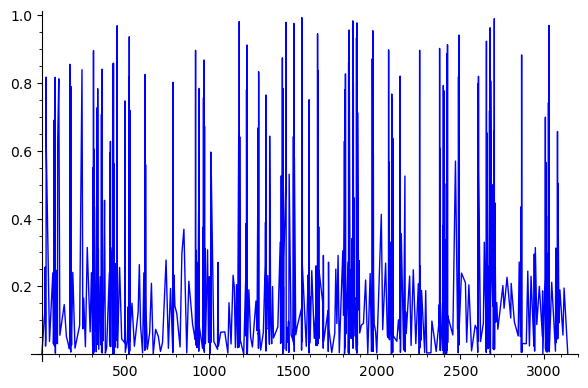

In [66]:
PL01

In [69]:
PL01.get_minmax_data()

{'xmin': 0.0,
 'xmax': 3141.592653589793,
 'ymin': 1.9909913854246305e-16,
 'ymax': 0.998789861924529}

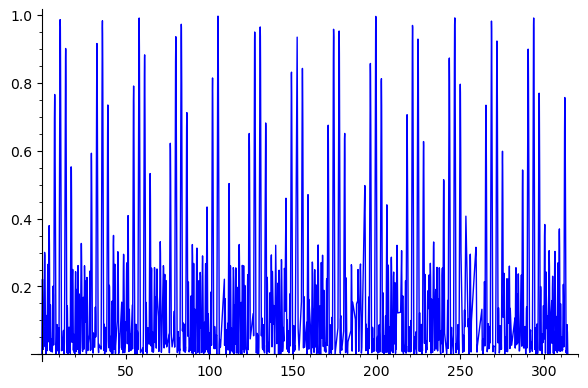

In [60]:
PL02


In [70]:
PL02.get_minmax_data()

{'xmin': 0.0,
 'xmax': 3141.592653589793,
 'ymin': 3.331246187637218e-16,
 'ymax': 0.9972498290425054}

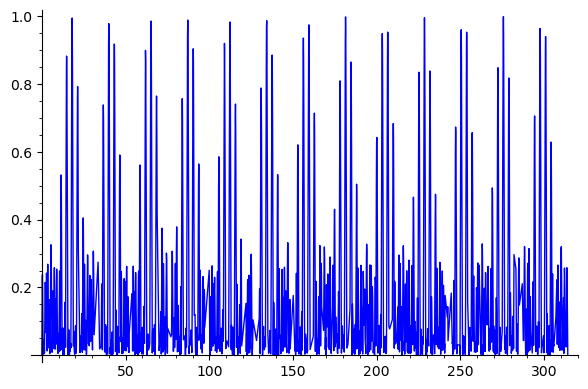

In [64]:
PL03

In [53]:
PL03.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 1.5974533408876415e-16,
 'ymax': 0.9787733989112855}